In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
#root_path = 'gdrive/Shared drives/OpenMonkeyChallenge'  #change dir to your project folder
!mkdir -p data/coco/images
!cd data/coco/images

!apt-get install fastjar 
!jar xvf ~/../content/gdrive/Shareddrives/OpenMonkeyChallenge/Training/train.zip 
!jar xvf ~/../content/gdrive/Shareddrives/OpenMonkeyChallenge/Validation/val.zip

!mv train train2017
!mv val val2017

In [ ]:
import os
for filename in os.listdir("val2017"):
        if not filename[:4].isnumeric():
            dst =filename[4:]
            src ='val2017/'+filename
            dst ='val2017/'+ dst
            os.rename(src, dst)
for filename in os.listdir("train2017"):
        if not filename[:5].isnumeric():
            dst =filename[6:]
            src ='train2017/'+filename
            dst ='train2017/'+ dst
            os.rename(src, dst)

In [ ]:
cd ~/../content/

/content


In [ ]:
!cp /content/gdrive/Shareddrives/OpenMonkeyChallenge/ToColab/output/coco/pose_resnet_50/256x192_d256x3_adam_lr1e-3_caffe/results/keypoints_val2017_results.json ./

In [ ]:
import json
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image
import pandas as pd

In [ ]:
f=open("keypoints_val2017_results.json")
data = json.load(f)


In [ ]:
df1=pd.DataFrame(data).set_index('image_id')
df1.head()

,category_id,center,keypoints,scale,score
image_id,,,,,
0,0,"[366.0, 331.0]","[350.2578125, 298.3046875, 0.8554186224937439,...","[1.162500023841858, 1.5499999523162842]",0.755286
1,0,"[608.0, 547.0]","[503.8984375, 447.9765625, 0.842449426651001, ...","[2.4375, 3.25]",0.642651
2,0,"[565.0, 478.0]","[570.2734375, 430.5390625, 0.6914399862289429,...","[1.6875, 2.25]",0.518754
3,0,"[350.5, 495.0]","[384.26953125, 461.23046875, 0.796347737312316...","[1.7062499523162842, 2.2750000953674316]",0.744333
4,0,"[280.0, 193.5]","[147.9296875, 131.5078125, 0.7730417847633362,...","[2.5874998569488525, 3.450000047683716]",0.696525


In [ ]:
f=open("/content/gdrive/Shareddrives/OpenMonkeyChallenge/ToColab/data/coco/annotations/val2017.json")
data = json.load(f)["annotation"]
df2=pd.DataFrame(data).set_index('id')
df2.head()

,file,species,bbox,landmarks,visibility
id,,,,,
0,0000000.jpg,Rhesus_macaque,"[273, 219, 186, 224]","[343, 301, 344, 301, 343, 304, 349, 289, 356, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ..."
1,0000001.jpg,Japanese_macaque,"[413, 317, 390, 460]","[516, 442, 515, 445, 505, 465, 525, 387, 547, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,0000002.jpg,Chimpanzee,"[430, 350, 270, 256]","[556, 430, 575, 435, 565, 437, 569, 420, 571, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,0000003.jpg,Japanese_macaque,"[214, 387, 273, 216]","[284, 480, 288, 481, 287, 491, 287, 467, 304, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,0000004.jpg,Crab-eating_macaque,"[73, 42, 414, 303]","[143, 128, 156, 129, 146, 141, 152, 112, 183, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


In [ ]:
df=df1.join(df2[["file"]] )
df.head()

,category_id,center,keypoints,scale,score,file
image_id,,,,,,
0,0,"[366.0, 331.0]","[350.2578125, 298.3046875, 0.8554186224937439,...","[1.162500023841858, 1.5499999523162842]",0.755286,0000000.jpg
1,0,"[608.0, 547.0]","[503.8984375, 447.9765625, 0.842449426651001, ...","[2.4375, 3.25]",0.642651,0000001.jpg
2,0,"[565.0, 478.0]","[570.2734375, 430.5390625, 0.6914399862289429,...","[1.6875, 2.25]",0.518754,0000002.jpg
3,0,"[350.5, 495.0]","[384.26953125, 461.23046875, 0.796347737312316...","[1.7062499523162842, 2.2750000953674316]",0.744333,0000003.jpg
4,0,"[280.0, 193.5]","[147.9296875, 131.5078125, 0.7730417847633362,...","[2.5874998569488525, 3.450000047683716]",0.696525,0000004.jpg


In [ ]:
# Data cleaning and features generation

rm_ids=[]
rots=[]
lines=[]

for i,pts in enumerate(df["keypoints"]):
    kps=np.array(pts)
    kpsx=np.array ( [kps[::3]] ).T
    kpsy=np.array ( [kps[1::3]]).T
    kps=np.hstack( [kpsx,kpsy] )
    
    jointa=kps[[4,8,9,10,5,6,7,11,14,15,12,13]]
    jointb=kps[[3,4,8,9 ,4,5,6,4 ,11,14,11,12]]
    ls=np.array( [jointa.T,jointb.T] ).T
    vec=jointa-jointb
    veca=vec[[7,1,2,3,4,5,6,8,9,10,11]]
    if np.any(np.linalg.norm(veca,axis=1)==0 ):
      rm_ids+=[i]
      continue
    veca=( (1/np.linalg.norm(veca,axis=1) ) *veca.T ).T
    vecb=vec[[0,7,1,2,7,4,5,7,8,7 ,10]]
    if np.any(np.linalg.norm(vecb,axis=1)==0 ):
      rm_ids+=[i]
      continue
    vecb=(vecb.T/np.linalg.norm(vecb,axis=1) ).T
    rotations=np.cross(veca, vecb)
    
    rots+=[rotations]
    lines+=[ls]
#lines=np.array(lines)
#rots=np.array(rots)

In [ ]:
df=df.drop(rm_ids)
df=df.drop(columns=["category_id","score"])
df["rotations"]=rots
df["lines"]=lines
df.head()

,center,keypoints,scale,file,rotations,lines
image_id,,,,,,
0,"[366.0, 331.0]","[350.2578125, 298.3046875, 0.8554186224937439,...","[1.162500023841858, 1.5499999523162842]",0000000.jpg,"[0.2689861728986474, -0.6074501075707971, -0.0...","[[[355.1015625, 350.2578125], [303.1484375, 29..."
1,"[608.0, 547.0]","[503.8984375, 447.9765625, 0.842449426651001, ...","[2.4375, 3.25]",0000001.jpg,"[-0.4007131980879553, 0.9413394041561389, -0.9...","[[[564.8359375, 514.0546875], [483.5234375, 39..."
2,"[565.0, 478.0]","[570.2734375, 430.5390625, 0.6914399862289429,...","[1.6875, 2.25]",0000002.jpg,"[0.32852062494127277, 0.7921409927817105, -0.6...","[[[573.7890625, 573.7890625], [448.1171875, 41..."
3,"[350.5, 495.0]","[384.26953125, 461.23046875, 0.796347737312316...","[1.7062499523162842, 2.2750000953674316]",0000003.jpg,"[-1.0, -0.3162277660168379, 0.9984603532054125...","[[[377.16015625, 377.16015625], [468.33984375,..."
4,"[280.0, 193.5]","[147.9296875, 131.5078125, 0.7730417847633362,...","[2.5874998569488525, 3.450000047683716]",0000004.jpg,"[0.8769757398360187, -0.39722300578227054, -0....","[[[174.8828125, 153.3203125], [142.2890625, 10..."


In [ ]:
import os

def viewimg(ids):
    root=os.getcwd()
    fig = plt.figure(figsize=(9,9))
    tot = len(ids)
    cols = 3
    rows = tot // cols 
    rows += tot % cols
    pos = range(1,tot + 1)
    
    for i,id in enumerate(ids):
        ax = fig.add_subplot(rows,cols,pos[i])
        data = image.imread(root+"/val2017/"+df["file"].iloc[id])
        for j,line in enumerate(lines[id]):
          c="red"
          if(j>=8):
            c="blue"
          elif j==0:
            c="yellow"
          ax.plot(line[0], line[1], color=c, linewidth=1)
        ax.imshow(data)
    plt.tight_layout()
    plt.show()



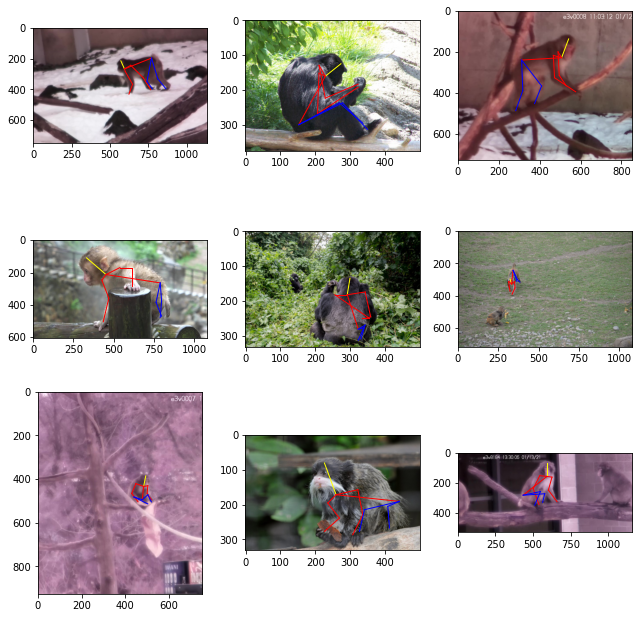

In [ ]:
viewimg( (np.random.rand(9)*len(df)).astype(int) )

In [ ]:
X=np.array(rots)
np.sum(X.flatten()==0)
np.any(np.isnan(X))

False

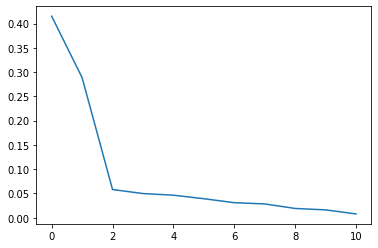

In [ ]:
from sklearn.decomposition import PCA
# Apply PCA to transform the data
X=np.array(rots)
numfeature=11
pca = PCA(n_components=numfeature)
pca.fit(X)
plt.plot(pca.explained_variance_ratio_)


In [ ]:
pca = PCA(n_components=2)
X_trans=pca.fit_transform(X)


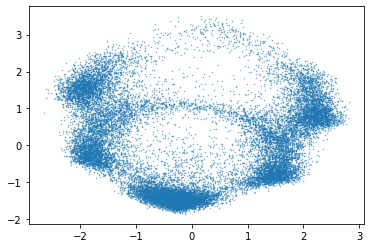

In [ ]:
plt.scatter(X_trans[:,0],X_trans[:,1] ,s=0.25,alpha=0.6)

In [ ]:
from sklearn.cluster import MeanShift

clustering = MeanShift(bandwidth=4).fit(X_trans)
clustering.labels_



KeyboardInterrupt: ignored

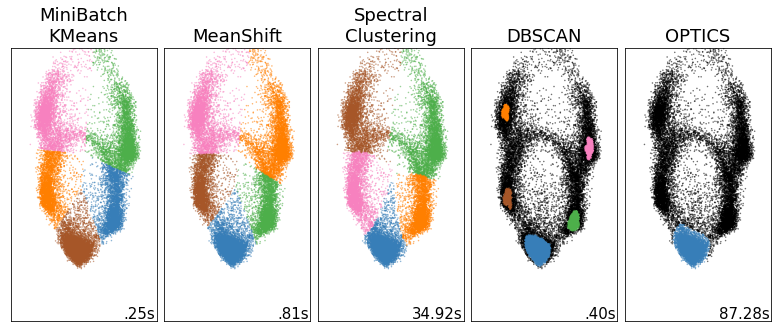

In [ ]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice


plt.figure(figsize=(4 * 2 + 3, 4))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)
default_base = {
    "quantile": 0.2,
    "eps": 0.06,
    "damping": 0.5,
    "preference": -10,
    "n_neighbors": 5,
    "n_clusters": 5,
    "min_samples": 100,
    "xi": 0.005,
    "min_cluster_size": 0.1,
}
plot_num = 1

for i in [1]:
    params = default_base.copy()
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X_trans)
    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])
    # connectivity matrix for structured Ward4
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"])
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"],min_samples=params["min_samples"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
   
    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("DBSCAN", dbscan),
        ("OPTICS", optics),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(1, len(clustering_algorithms), plot_num)
        plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred], s=0.25,alpha=0.6)
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

Kmeans run fastest and the result is acceptable

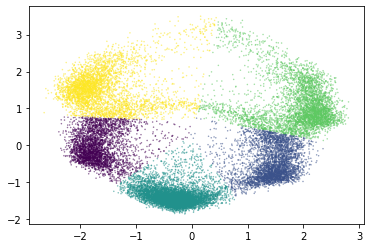

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_trans)
plt.scatter(X_trans[:,0],X_trans[:,1] ,s=0.25,alpha=0.6,c=kmeans.labels_ )
plt.show()

Cluster: 0


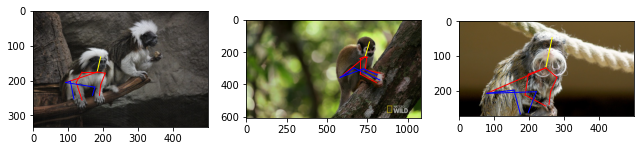

Cluster: 1


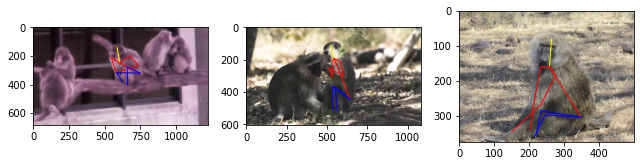

Cluster: 2


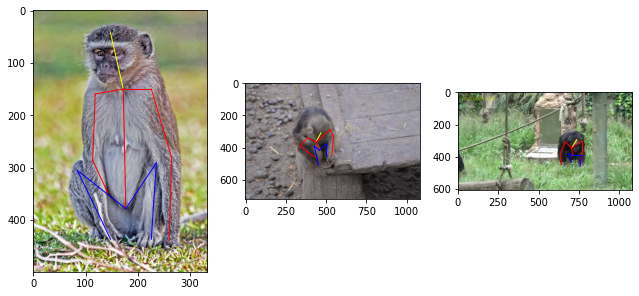

Cluster: 3


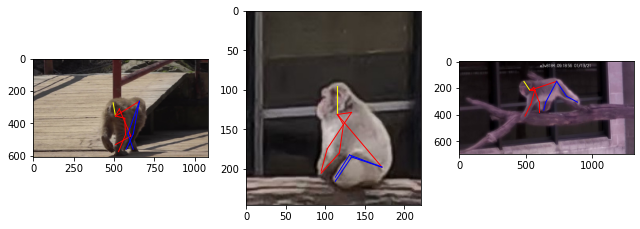

Cluster: 4


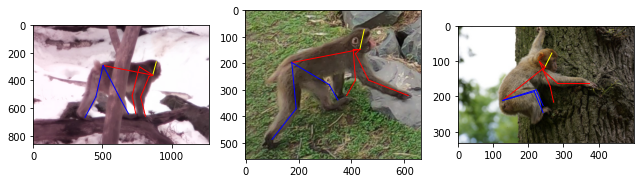

In [ ]:
for i,centroid in enumerate(kmeans.cluster_centers_):
    ids=np.argsort( np.linalg.norm(X_trans-centroid,axis=1) )[:3]
    print("Cluster:",i)
    viewimg(ids)
    

Poses that are furthest away from the clusters

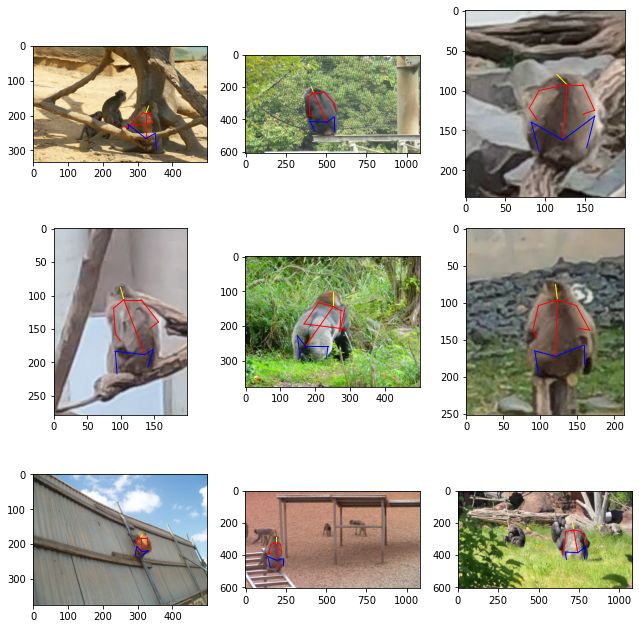

In [ ]:
sumdist=0
for i,centroid in enumerate(kmeans.cluster_centers_):
    sumdist+=np.linalg.norm(X_trans-centroid,axis=1) 
ids=np.argsort( sumdist) [-9:]
viewimg(ids)

In [ ]:
kmeans.predict(X_trans[ids])

array([3, 4, 4, 3, 4, 4, 3, 4, 3], dtype=int32)